In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle

from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

%matplotlib inline

## Load results

In [3]:
all_out = glob("out/**/*.pkl")

In [4]:
all_out = [load_pickle(p) for p in all_out]

In [5]:
extracted_res = []
xgboost_results = []
tabpfn_results = []

for out in all_out: 
    try:
        res = {
            'train_size': out['train_size'],
            'frac_valid': out['frac_valid'],
            'accuracy': out['accuracy'],
            'f1_macro': out['f1_macro'],
            'f1_micro': out['f1_micro'],
            'kappa': out['kappa'],
            "num_classes": out['num_classes'],
            "representation": out['representation']
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        'train_size': out['train_size'], 
        'accuracy': out['xgboost_baseline']['accuracy'], 
        'f1_macro': out['xgboost_baseline']['f1_macro'],
        'f1_micro': out['xgboost_baseline']['f1_micro'],
        'kappa': out['xgboost_baseline']['kappa'],
        "num_classes": out['num_classes']
    }

    tabpfn_res = {
        'train_size': out['train_size'], 
        'accuracy': out['tabpfn_baseline']['accuracy'], 
        'f1_macro': out['tabpfn_baseline']['f1_macro'],
        'f1_micro': out['tabpfn_baseline']['f1_micro'],
        'kappa': out['tabpfn_baseline']['kappa'],
        "num_classes": out['num_classes']
    }

    
    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)

In [6]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)

In [7]:
grouped_res = res.groupby(['num_classes', "representation", 'train_size']).agg(['mean', 'std'])

In [8]:
grouped_xgboost_res = xgboost_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

In [9]:
grouped_tabpfn_res = tabpfn_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

In [10]:
grouped_res.loc[2,:]

frac_valid     accuracy      f1_macro     f1_micro  \
                                mean std     mean std      mean std     mean   
representation train_size                                                      
inchi          10                1.0 NaN    0.556 NaN  0.523810 NaN    0.556   
               50                1.0 NaN    0.760 NaN  0.757376 NaN    0.760   
               100               1.0 NaN    0.852 NaN  0.851998 NaN    0.852   
iupac_name     10                1.0 NaN    0.536 NaN  0.491442 NaN    0.536   
               50                1.0 NaN    0.640 NaN  0.638867 NaN    0.640   
selfies        10                1.0 NaN    0.700 NaN  0.684741 NaN    0.700   
               50                1.0 NaN    0.800 NaN  0.799679 NaN    0.800   
smiles         10                1.0 NaN    0.468 NaN  0.461722 NaN    0.468   
               50                1.0 NaN    0.744 NaN  0.743852 NaN    0.744   
               100               1.0 NaN    0.872 NaN  0.871926 NaN    0.872   

                               kappa      
                          std   mean std  
representation train_size                 
inchi          10         NaN  0.112 NaN  
               50         NaN  0.520 NaN  
               100        NaN  0.704 NaN  
iupac_name     10         NaN  0.072 NaN  
               50         NaN  0.280 NaN  
selfies        10         NaN  0.400 NaN  
               50         NaN  0.600 NaN  
smiles         10         NaN -0.064 NaN  
               50         NaN  0.488 NaN  
               100        NaN  0.744 NaN

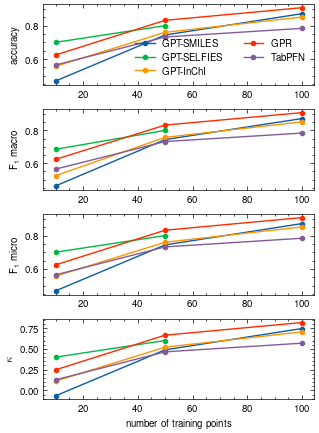

In [11]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_res.loc[2, 'smiles', :].index,
        grouped_res.loc[2, 'smiles', :][metric]['mean'],
        marker='o',
        label='GPT-SMILES',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'smiles', :].index,
        grouped_res.loc[2, 'smiles', :][metric]['mean'] - grouped_res.loc[2, 'smiles', :][metric]['std'],
        grouped_res.loc[2, 'smiles', :][metric]['mean'] + grouped_res.loc[2, 'smiles', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[2, 'selfies', :].index,
        grouped_res.loc[2, 'selfies', :][metric]['mean'],
        marker='o',
        label='GPT-SELFIES',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'selfies', :].index,
        grouped_res.loc[2, 'selfies', :][metric]['mean'] - grouped_res.loc[2, 'selfies', :][metric]['std'],
        grouped_res.loc[2, 'selfies', :][metric]['mean'] + grouped_res.loc[2, 'selfies', :][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_res.loc[2, 'inchi', :].index,
        grouped_res.loc[2, 'inchi', :][metric]['mean'],
        marker='o',
        label='GPT-InChI',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'inchi', :].index,
        grouped_res.loc[2, 'inchi', :][metric]['mean'] - grouped_res.loc[2, 'inchi', :][metric]['std'],
        grouped_res.loc[2, 'inchi', :][metric]['mean'] + grouped_res.loc[2, 'inchi', :][metric]['std'],
        alpha=0.2,
    )



    ax[i].plot(
        grouped_xgboost_res.loc[2,:].index,
        grouped_xgboost_res.loc[2,:][metric]['mean'],
        marker='o',
        label='GPR'
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[2,:].index,
        grouped_xgboost_res.loc[2,:][metric]['mean'] - grouped_xgboost_res.loc[2,:][metric]['std'],
        grouped_xgboost_res.loc[2,:][metric]['mean'] + grouped_xgboost_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[2,:].index,
        grouped_tabpfn_res.loc[2,:][metric]['mean'],
        marker='o',
        label='TabPFN'
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[2,:].index,
        grouped_tabpfn_res.loc[2,:][metric]['mean'] - grouped_tabpfn_res.loc[2,:][metric]['std'],
        grouped_tabpfn_res.loc[2,:][metric]['mean'] + grouped_tabpfn_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

ax[-1].set_xlabel('number of training points')
ax[0].legend(ncols=2)

ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('freesolv-classification_results_binary.pdf', bbox_inches='tight')

KeyError: 5

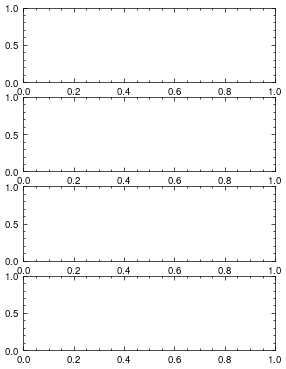

In [12]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_res.loc[5, 'smiles', :].index,
        grouped_res.loc[5, 'smiles', :][metric]['mean'],
        marker='o',
        label='GPT-SMILES',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'smiles', :].index,
        grouped_res.loc[5, 'smiles', :][metric]['mean'] - grouped_res.loc[5, 'smiles', :][metric]['std'],
        grouped_res.loc[5, 'smiles', :][metric]['mean'] + grouped_res.loc[5, 'smiles', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[5, 'selfies', :].index,
        grouped_res.loc[5, 'selfies', :][metric]['mean'],
        marker='o',
        label='GPT-SELFIES',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'selfies', :].index,
        grouped_res.loc[5, 'selfies', :][metric]['mean'] - grouped_res.loc[5, 'selfies', :][metric]['std'],
        grouped_res.loc[5, 'selfies', :][metric]['mean'] + grouped_res.loc[5, 'selfies', :][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_res.loc[5, 'inchi', :].index,
        grouped_res.loc[5, 'inchi', :][metric]['mean'],
        marker='o',
        label='GPT-InChI',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'inchi', :].index,
        grouped_res.loc[5, 'inchi', :][metric]['mean'] - grouped_res.loc[5, 'inchi', :][metric]['std'],
        grouped_res.loc[5, 'inchi', :][metric]['mean'] + grouped_res.loc[5, 'inchi', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[5, 'name', :].index,
        grouped_res.loc[5, 'name', :][metric]['mean'],
        marker='o',
        label='GPT-Name',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'name', :].index,
        grouped_res.loc[5, 'name', :][metric]['mean'] - grouped_res.loc[5, 'name', :][metric]['std'],
        grouped_res.loc[5, 'name', :][metric]['mean'] + grouped_res.loc[5, 'name', :][metric]['std'],
        alpha=0.2,
    )
    
    ax[i].plot(
        grouped_xgboost_res.loc[5,:].index,
        grouped_xgboost_res.loc[5,:][metric]['mean'],
        marker='o',
        label='GPR'
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[5,:].index,
        grouped_xgboost_res.loc[5,:][metric]['mean'] - grouped_xgboost_res.loc[5,:][metric]['std'],
        grouped_xgboost_res.loc[5,:][metric]['mean'] + grouped_xgboost_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[5,:].index,
        grouped_tabpfn_res.loc[5,:][metric]['mean'],
        marker='o',
        label='TabPFN'
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[5,:].index,
        grouped_tabpfn_res.loc[5,:][metric]['mean'] - grouped_tabpfn_res.loc[5,:][metric]['std'],
        grouped_tabpfn_res.loc[5,:][metric]['mean'] + grouped_tabpfn_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

ax[-1].set_xlabel('training size')
ax[0].legend(ncols=2, columnspacing=.5)

ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('freesolv-classification_results_5_class.pdf', bbox_inches='tight')